# 파이토치로 Logistic Regression 구현하기

Linear Regression - 예측하는 모델 (continuous)



Logistic Regression - 둘 중 하나를 고르는 모델, 확률적 접근 가능 (discrete)
(Binary classification, 둘 중 하나를 고르기 때문에 출력 데이터 0 또는 1의 값)


ex) height and weight - height을 보고 weight을 예측
ex) height, weight and obesity - obesity / not obesity 

### Linear Regression으로 Classification 작업을 수행할 수 없는 이유?

Outlier - 다른 데이터들과 지나치게 동떨어져 있는 경우, 정확도가 떨어짐(overfitting problem) #random fluctation
H(x)의 값이 0과 1사이에 없을 경우

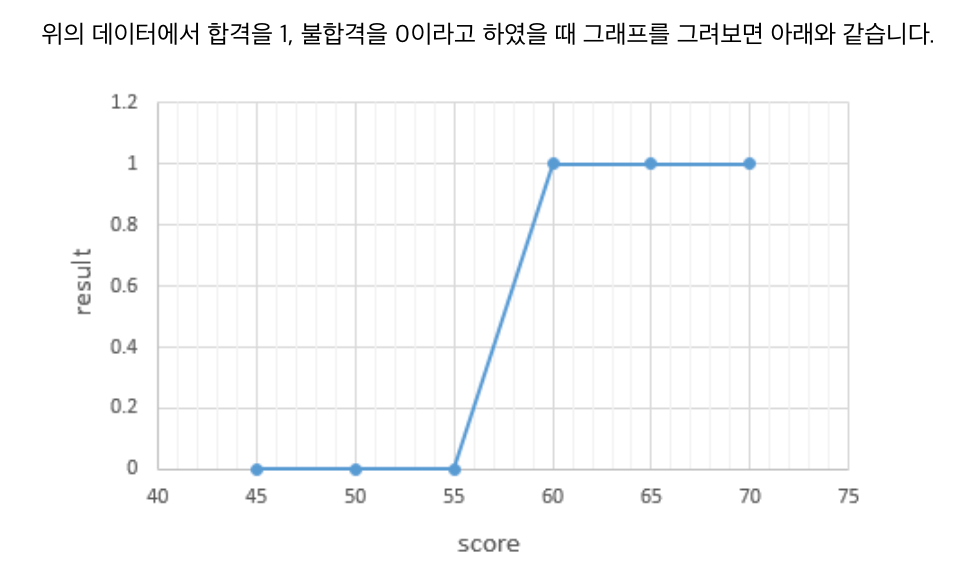

In [7]:
from IPython.display import Image
Image("./pytorch_logistic_r/logistic.png",width=450,height=300)

S자 형태로 표현되어 Wx + b와 같은 직선 함수가 아닌 S자 모양의 그래프를 만들 수 있는 특정 함수 f를 추가적으로 사용 
H(x) = f(Wx+b)

### MSE가 아닌 Cross-Entropy loss를 사용하는 이유?

cost함수의 그래프가 구불구불해져 Gradient Discent 방법을 사용하는데 문제가 생김
- 구불구불 해진 부분이 local minimum이 되어버려서 global minimum을 찾지 못하고 local minimum에 붙잡힘. 
- cost가 최소가 되는 가중치 W를 찾는다는 비용 함수의 목적이 아님

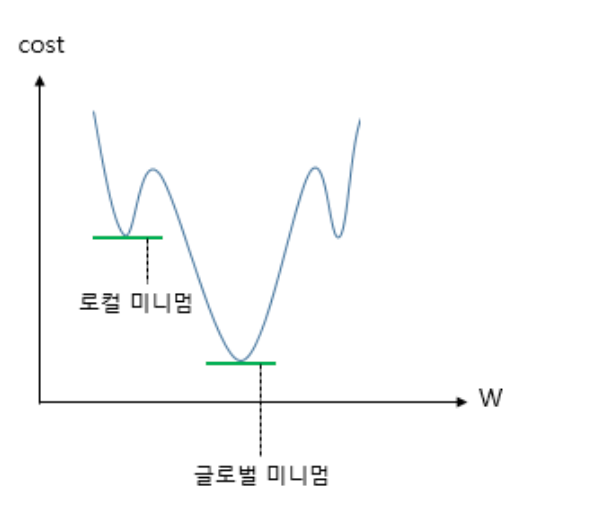

In [11]:
Image("./pytorch_logistic_r/localminimum.png",width=350,height=300)

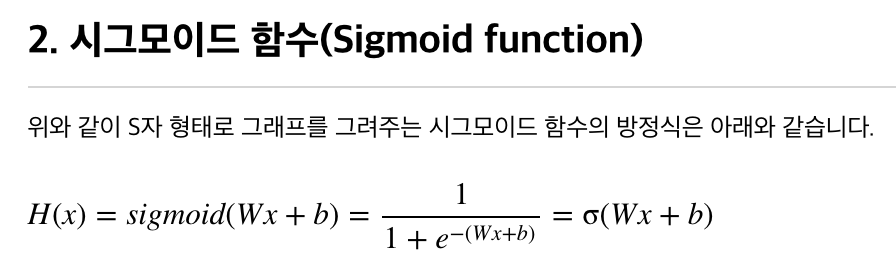

In [8]:
Image("./pytorch_logistic_r/sigmoid.png",width=450,height=300)

In [ ]:
H(x) = -1 / (1 + torch.exp(-(x_train.matmul(W) + b))) #exp 거듭제곱 꼴을 편하게 구현 W-가중치 벡터(6x2) (2X1)
H(x) = torch.sigmoid(x_train.matmul(W) + b)
H(x) = nn.Sigmoid #nn module을 사용했을 경우

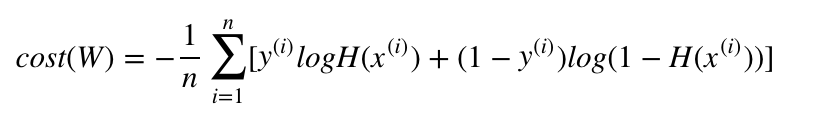

In [9]:
Image("./pytorch_logistic_r/cost.png",width=450,height=300)

cross_entropy_loss으로 loss 계산
y(i)- 어떤 판단을 내릴지
x(i)- 어떤 사진
앞에 y(i)가 1이면 뒤에 (1-y(i))는 0으로 판단

In [ ]:
losses = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis))
losses = F.binary_cross_entropy(hypothesis,y_train) 

### 코드 구현

This code is based on the https://wikidocs.net/60683

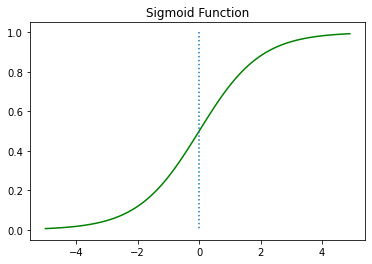

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)


plt.plot(x,y,'g') #x,y 그래프를 그어준것
plt.plot([0,0],[1.0,0.0],':') #':'선을 그어준것
plt.title('Sigmoid Function')
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


torch.manual_seed(1)

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)


class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2,1) #2->1
        self.sigmoid = nn.Sigmoid()

    def forward(self,x):
        return self.sigmoid(self.linear(x))

model = BinaryClassifier()

optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    #H(x) = -1 / (1 + torch.exp(-(x_train.matmul(W) + b)))
    #H(x) = torch.sigmoid(x_train.matmul(W) + b)
    hypothesis = model(x_train)

    # cost = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis)).mean()
    cost = F.binary_cross_entropy(hypothesis,y_train)

    #cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    #20번마다 로그
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) #예측값이 0.5를 넘으면 True

        # 정답과 예측을 비교해서 정확도를 계산
        correct_prediction = prediction.float() == y_train #실제값과 일치하는 경우 True
        accuracy = correct_prediction.sum().item() / len(correct_prediction) #정확도 계산 # loss.item() gets the scalar value held in the loss.
        print('Epoch {:4d}/{} Cost: {:6f} Accuracy {:2.2f}%'.format( #why is loss function in scalar?
              epoch, nb_epochs,cost.item(),accuracy*100,)) ## 각 에포크마다 정확도 출력

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614853 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00